Question: develop a model to predict the likelihood of uptake of the gsm product i.e. column "uptake_likelihood" is the one to be predicted.

In [ ]:
problem statement
-----lores ipsum-------

objectives
to create a d

PART 1: understand the dataset

In [1]:
# import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the file
df = pd.read_csv('gsm_services.csv')

In [3]:
# to check the first rows of the data set
df.head()

,Id,relevant,quality,consistent,price,uptake_likelihood
0,118,7.7,3.8,6.7,2.2,High
1,110,7.2,3.6,6.1,2.5,High
2,132,7.9,3.8,6.4,2.0,High
3,136,7.7,3.0,6.1,2.3,High
4,119,7.7,2.6,6.9,2.3,High


In [4]:
# check the no of rows and columns
df.shape

(150, 6)

In [5]:
# get the columns and dataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   relevant           150 non-null    float64
 2   quality            150 non-null    float64
 3   consistent         150 non-null    float64
 4   price              150 non-null    float64
 5   uptake_likelihood  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.nunique()

Id                   150
relevant              35
quality               23
consistent            43
price                 22
uptake_likelihood      3
dtype: int64

In [7]:
df.describe()

,Id,relevant,quality,consistent,price
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.columns

Index(['Id', 'relevant', 'quality', 'consistent', 'price',
       'uptake_likelihood'],
      dtype='object')

well, this is what i have understood about the data set
1) The data set has 150 rows and 6 collumns 
In the columns id has an integer DType, while relevant,quality,consistent,price are float while the uptake_likelihood is an object and we should keep that in mind
2) The are no non values - thats a good thing
3) the dataset collumns has quite a number of unique values in the different columns 

# next step is to visualize the dataset to have a visual aid of what we are dealing with

In [9]:
# creating a list
features_id = ['Id'] # no need to plot 
features_continuos = ['relevant', 'quality', 'consistent', 'price']
features_categories = ['uptake_likelihood']

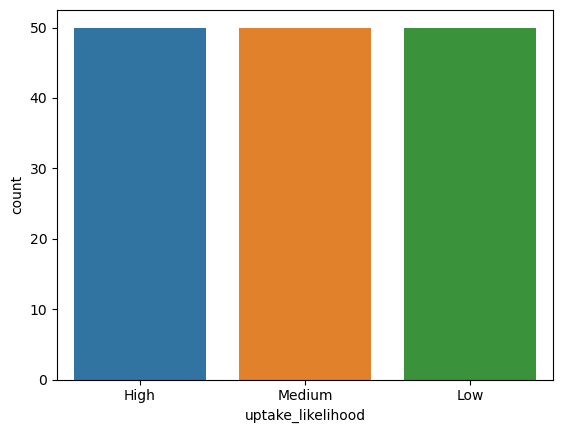

In [10]:
for feature in features_categories:
    sns.countplot(data=df, x= feature)
    plt.show()

In [11]:
df['uptake_likelihood'].value_counts()

uptake_likelihood
High      50
Medium    50
Low       50
Name: count, dtype: int64

noticed that both high, medium and low have the same counts accross, sth different 

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


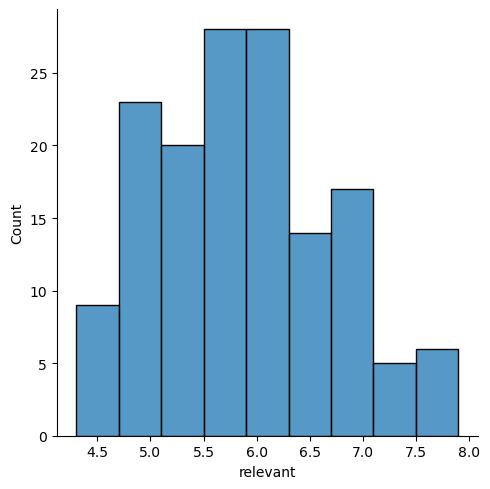

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


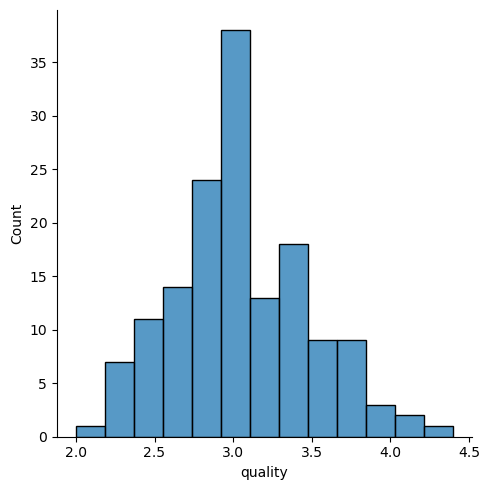

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


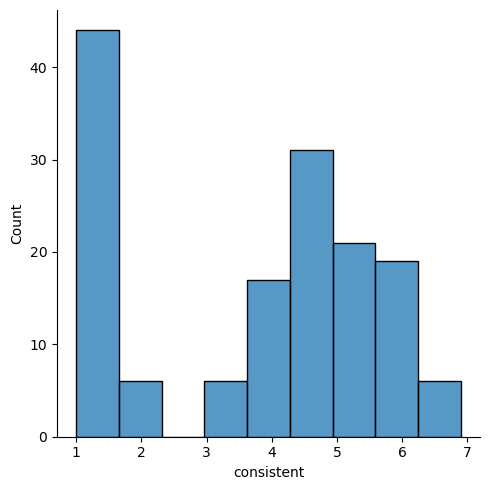

C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


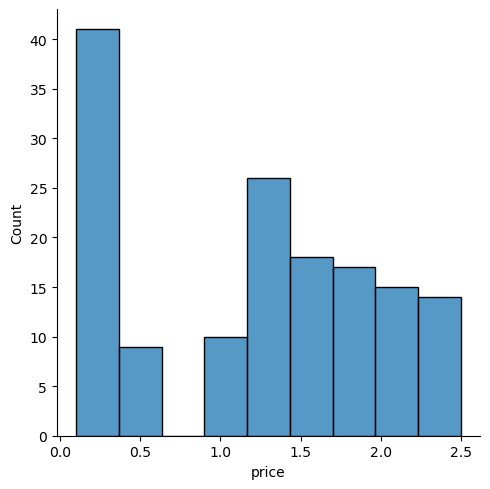

In [12]:
for feature in features_continuos:
    sns.displot(data=df, x=feature)
    plt.show()

from the plots i can see there are outliers in some columns, i need to remember that * ill have to check if i am right

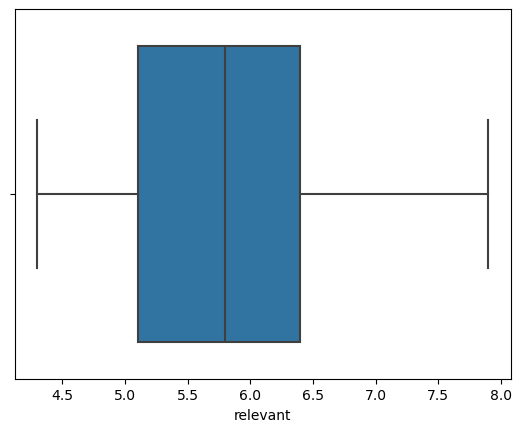

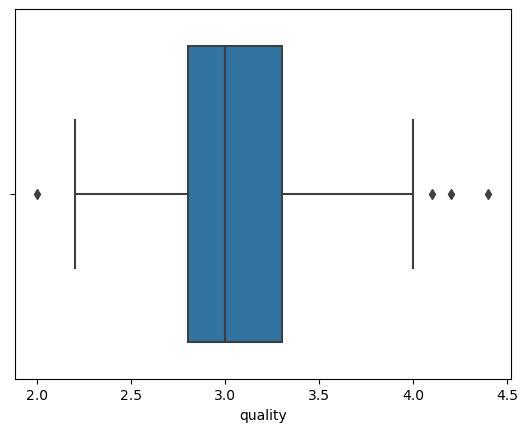

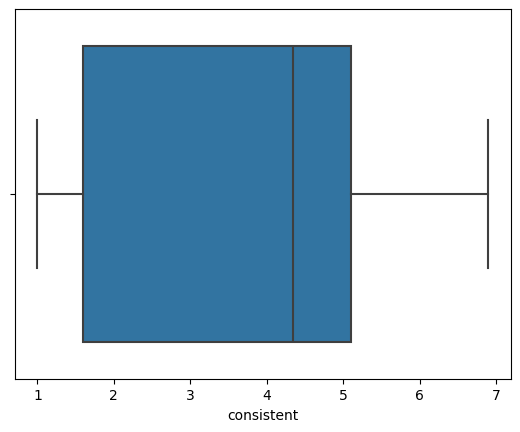

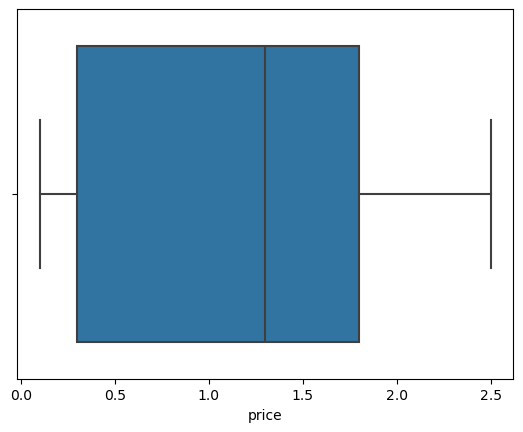

In [13]:
check_data = ['relevant', 'quality', 'consistent', 'price']

for feature in check_data:
    sns.boxplot(data=df, x= feature)
    plt.show()

okay i can see that its only quality that has outliers and the rest are okay 

In [14]:
feature_mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df['uptake_likelihood'] = df['uptake_likelihood'].map(feature_mapping).fillna(df['uptake_likelihood'])

df['uptake_likelihood']

0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Name: uptake_likelihood, Length: 150, dtype: int64

In [34]:
df.corr()

,Id,relevant,quality,consistent,price,uptake_likelihood
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
relevant,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
quality,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
consistent,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
price,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
uptake_likelihood,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

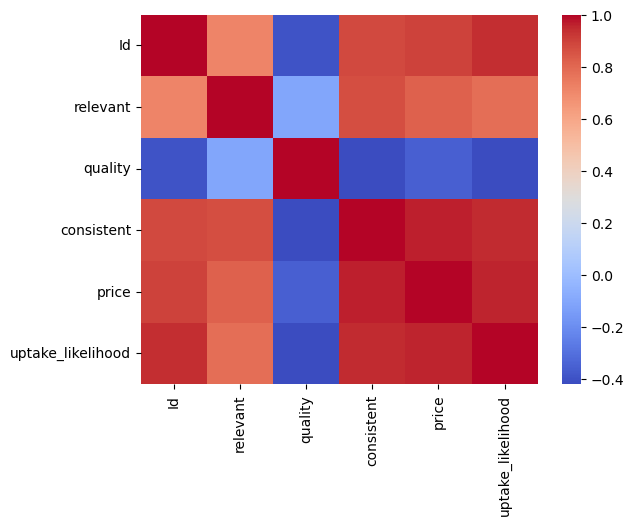

In [35]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  

from sklearn.linear_model import LogisticRegression #importing  LogisticRegression algorithm
from sklearn.neighbors import KNeighborsClassifier #importing kNearestNeighbours
from sklearn.naive_bayes import GaussianNB # importing Nausia-Bayes
from sklearn.svm import SVC # importing Support Vector Machine

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, roc_curve, auc

In [16]:
# first step is to split the data
X = df.drop(['Id','uptake_likelihood'],axis=1) #ID
y = df['uptake_likelihood']

#function to split the DataFrame into training and testing sets
X_train ,X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=20)

scaler= MinMaxScaler() #creates an instance of Scaler to scale features of both traning and testing
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X.head()

,relevant,quality,consistent,price
0,7.7,3.8,6.7,2.2
1,7.2,3.6,6.1,2.5
2,7.9,3.8,6.4,2.0
3,7.7,3.0,6.1,2.3
4,7.7,2.6,6.9,2.3


In [18]:
svm= SVC()

svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted') 
svm_recall = recall_score(y_test, svm_pred, average='weighted')  

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [22]:
naive = GaussianNB()

naive.fit(X_train_scaled, y_train)
naive_pred = naive.predict(X_test_scaled)

naive_accuracy = accuracy_score(y_test, naive_pred)
naive_precision = precision_score(y_test, naive_pred, average='weighted')
naive_recall = recall_score(y_test, naive_pred, average='weighted')

print(classification_report(y_test,naive_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [25]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
dr = DecisionTreeClassifier()
dr.fit(X_train_scaled, y_train)
dr_pred = dr.predict(X_test_scaled)

print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [36]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [39]:
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_scaled, y_train)
y_pred = RF.predict(X_test_scaled)
pred_prob = RF.predict_proba(X_test_scaled)

In [45]:
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

fpr = {}
tpr = {}
thresh = {}

n_class = df.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    #
    plt.plot(fpr[i], tpr[i], linestyle='--', label='%S vs Rest (AUC=%0.2f)'%(df[i],roc_auc[i]))

plt.plot([0,1],[0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1,5])
plt.title('uptake likelihood')
plt.xlabel('low')
plt.ylabel('High')
plt.legend(loc='lower-right')

KeyError: 0

In [ ]:
# decison tree, random forest, xgbbosst  *ensemble methods 
# add table to show feature importance, ROC-AUC curve/plot